<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
- Edzná Franco Jaramillo.
- José Pablo Vázquez Tello

**Fecha:** 05 de marzo del 2020.

**Expediente** : 
- 706432
- 709896

Liga de github: https://github.com/na98/Tarea_6

**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 10

### Ejercicio 1: 

Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.



$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$

$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(1+k)k!}$$

$$P(k + 1)=\frac{\lambda}{(1+k)} P(k,\lambda) $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def prob_acum_Poisson(k, lam):
    global pr 
    pr = np.zeros(k)
    pr[0] = np.exp(-lam)
    def f(i):
        global pr
        pr[i+1] = (lam / (i + 1)) * pr[i]
        
    [pr[i] for i in range (k-1)]
    return np.cumsum(pr)

In [ ]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

In [ ]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y,label=label)
    plt.legend()
    plt.show()

In [ ]:
N = 10**4
lam = 4
n = 15

p_acum = prob_acum_Poisson(n, lam)
u = np.random.rand(N)

# Usando el método de la transformada inversa
#d_poisson = Gen_distr_discreta(u, p_acum)

plt.figure(figsize=[13, 4])
plt.subplot(121)
d_poisson = list(map(lambda j: sum(1 for i in p_acum if i < u[j]), range(N)))
plt.hist(d_poisson, 100, density=True, label='Usando función creada')
plt.legend()

plt.subplot(122)
d_poisson_np = np.random.poisson(lam, N)
plt.hist(d_poisson_np, 100, density=True, label='Usando Numpy')
plt.legend()
np.histogram
plt.show()



#plot_histogram_discrete(d_poisson,'usando función creada')

>Aunque no encontré la razón por la cual no salen iguales las gráficas, adjunto el código para ver que parte es la que tiene el error. 

### Ejercicio 2:
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.special import factorial
from scipy import optimize
from scipy.stats import beta

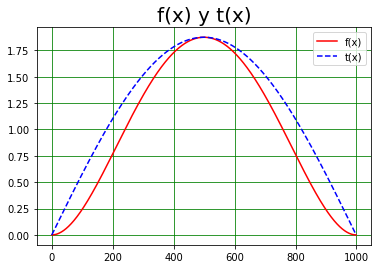

In [2]:
f= lambda x:30*(x**2-2*x**3+x**4)
t = lambda x,a: a*np.sin(np.pi*x)
maxf = f(optimize.fmin(lambda x:-f(x),0,disp=False));
plt.plot(f(np.linspace(0,1,1000)),label = "f(x)",color='red')
plt.plot(t(np.linspace(0,1,1000),maxf),"b--",label="t(x)")
plt.title("f(x) y t(x)", size=20)
plt.legend()
plt.grid(color='g')
plt.show()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

 $$t(x) = a\cdot sin(\pi\cdot x)$$<br>
$$a = max(f(x))$$<br>
$$c =\int_{0}^{1} t(x)dx \longrightarrow c =\int_{0}^{1} a\cdot sin(\pi\cdot x)dx\longrightarrow c = \max(f(x))\int_{0}^{1} sin(\pi\cdot x)dx$$<br>
$$c =\max(f(x))\cdot\left[-\frac{\cos(\pi \cdot x)}{\pi}\right]_0^1 = \max(f(x))\cdot \left(\frac{1}{\pi}+\frac{1}{\pi}\right) = \frac{2 \max(f(x))}{\pi}$$<br>
$$g(x) = \frac{t(x)}{c} = \frac{max(f(x))\cdot \sin(\pi \cdot x)}{\frac{2 \max(f(x))}{\pi}} = \frac{\pi\cdot \sin(\pi \cdot x) }{2}$$

**<center> Validar**<br>
$$G(x) = \int_{-\infty}^{\infty} g(x)dx=\int_{0}^{1} g(x)dx = \frac{\pi}{2}\int_{0}^{1} \sin(\pi \cdot x)dx $$
$$= -\frac{1}{2}\cdot \cos(x \pi)|_0^1 = \frac{1}{2}\cdot (1 +1) = 1$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

**Aplicamos método de transformada inversa**
$$G(x) = \int_{0}^{x} g(x)dx = \frac{\pi}{2}\int_{0}^{x} \sin(\pi \cdot x)dx $$
$$= -\frac{1}{2}\cdot \cos(x \pi)|_0^x = \frac{1}{2}\cdot (1-\cos(\pi x)) = U $$
**Despejamos**    
$$ x = \frac{\cos^{-1}(1- 2\cdot U )}{\pi} $$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

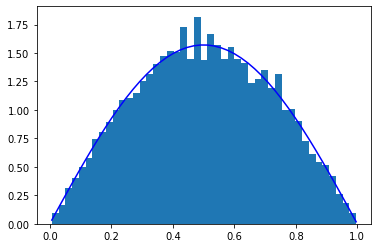

In [3]:
N = 10000
X =lambda u: (np.arccos(1-2*u))/np.pi
g_x =lambda x : (np.pi/2)*np.sin(np.pi*x)
U = np.random.uniform(0,1,N) 
x = X(U)
count, xx, ignored = plt.hist(x,bins=45,density=True)
plt.plot(xx,g_x(xx),"b")
plt.show()

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

In [4]:
def Acep_rechazo(R2:'Variables distruidas U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 F:'Función objetivo a generar',
                 T:'Función que mayora a f'):
    f_x = F(R1)
    t_x = T(R1)
    condition = np.multiply(R2,t_x)<=f_x

    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') for i in range(len(R1))]
                
    plt.show()
    return np.sum(condition)/len(condition),np.multiply(R2,t_x)[np.multiply(R2,t_x)<=f_x]

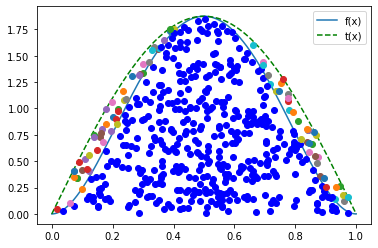

In [5]:
N=500
X =lambda u: (np.arccos(1-2*u))/np.pi
U = np.random.uniform(0,1,N)
x = X(U)
R2 = np.random.rand(N)
R1 = x
F = lambda x: 30*(x**2-2*x**3+x**4)
T = lambda x: maxf*np.sin(np.pi*x)
plt.plot(np.linspace(0,1,1000),F(np.linspace(0,1,1000)),label="f(x)")
plt.plot(np.linspace(0,1,1000),T(np.linspace(0,1,1000)),"g--",label="t(x)")
plt.legend()
acep = Acep_rechazo(R2,R1,F,T)
plt.show()

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [6]:
def Acep_rechazoS(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    c=np.zeros(len(R1))
    condition = np.multiply(R2,t_x)<=f_x
    c = np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return c

In [8]:
Aceptacion_Senoidal = Acep_rechazoS(R2,R1,f,t)/len(R1)
print('El porcentaje de puntos aceptados cuando usas un pulso senoidal es:',Aceptacion_Senoidal*100,'%')

El porcentaje de puntos aceptados cuando usas un pulso senoidal es: 55.400000000000006 %


El máximo de f es: [1.875]


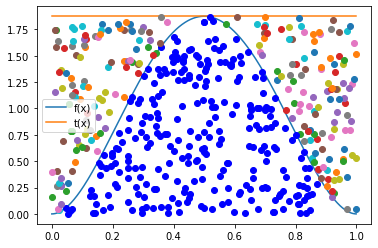

In [9]:
f = lambda x:30*(x**2-2*x**3+x**4)

max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))

t = lambda x: max_f*np.ones(len(x)) 
R2 = np.random.rand(N)
R1 = np.random.rand(N)
x = np.arange(0,1,0.001)  
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep = Acep_rechazo(R2,R1,f,t)

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [12]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    
    #Regresar lista de valores
    return [R1[i] for i in range(len(R1)) if condition[i]]

In [13]:
f = lambda x: 20*x*(1-x)**3
maxf = f(optimize.fmin(lambda x:-f(x),0,disp=False))

El máximo de f es: [2.109375]


(array([0.95216496, 2.30524149, 1.95444388, 1.85421598, 2.00455782,
        1.50341837, 0.65148129, 0.35079762, 0.10022789, 0.15034184]),
 array([0.02113422, 0.1056873 , 0.19024037, 0.27479344, 0.35934652,
        0.44389959, 0.52845266, 0.61300574, 0.69755881, 0.78211189,
        0.86666496]),
 <a list of 10 Patch objects>)

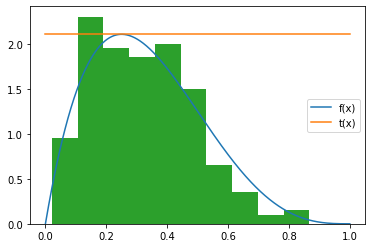

In [14]:
t = lambda x: maxf*np.ones(len(x)) 
x = np.arange(0,1,0.001) 
print('El máximo de f es:',maxf)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()


N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N)

variables_alt = Acep_rechazo(R2,R1,f,t)
plt.hist(variables_alt, bins=10, density=True)